# Grundlagen der Künstlichen Intelligenz - Wintersemester 2025/26


# Übung 3: Neuronale Netzwerke und Backpropagation

---

> **Grundlagen der künstlichen Intelligenz** im Wintersemester 2025/2026
>
> - Prof. Pascal Friederich, pascal.friederich@kit.edu
> - T.T.-Prof. Peer Nowack, peer.nowack@kit.edu
>
> Übungsleiter für die aktuelle Übung: Ulrich Oberhofer, ulrich.oberhofer@kit.edu
>
> ⚠️ Bei allgemeinen Fragen zu Aufgabenstellungen etc. bitte im Ilias Forum posten, sodass wir diese Fragen nur ein Mal für alle Studierenden beantworten können. E-Mail an den Übungsleiter bitte nur für individuelle Fragen, deren Beantwortung nicht für alle Studierenden relevant ist.

---

- **Wir nutzen ein automatisiertes Grading System zur Bewertung der Jupyter Notebooks (siehe unten für Details)**

### Übungsteam

- Mozhgan Amiramjadi, mozhgan.amjadi@kit.edu
- Lina Rennstich, lina.rennstich@kit.edu
- Ulrich Oberhofer, ulrich.oberhofer@kit.edu
- Laura Ruple, laura.ruple@kit.edu
- Henrik Schopmans, henrik.schopmans@kit.edu
- Jonas Teufel, jonas.teufel@kit.edu

# Gruppenabgabe

Die Übungsblätter können in Gruppen von bis zu **3 Studierenden** abgegeben werden. **Jede Person aus der Gruppe muss die finale Version der Abgabe über Ilias hochladen**, es genügt nicht, dass nur eine Person aus der Gruppe dies tut. Es ist prinzipiell möglich, sich im Laufe des Semesters einer neuen Gruppe anzuschließen, sollte sich die eigene Gruppe vorzeitig auflösen. Generell muss jede Gruppe ihre eigene Lösung hochladen, wir werden die Abgaben auf Duplikate überprüfen.

Die Gruppen werden automatisch erfasst, **gebt deshalb die u-Kürzel eurer Gruppenmitglieder in die folgende Zelle ein.** Falls eure Gruppe nur aus 2 Studierenden besteht, oder ihr alleine abgibt, lasst die verbleibenden Felder frei. Hier ein Beispiel für eine Gruppe bestehend aus uabcd und uefgh:

_U-Kürzel der Gruppenmitglieder:_

_Mitglied 1: uabcd_

_Mitglied 2: uefgh_

_Mitglied 3:_


U-Kürzel der Gruppenmitglieder:

Mitglied 1: ubrfu

Mitglied 2: uysax

Mitglied 3: udxde


# Auto-grading

Wir nutzen ein auto-grading System, welches eure abgegebenen Jupyter Notebooks automatisch analysiert und über
hidden tests auf Richtigkeit prüft. Über diese Tests werden die Punkte bestimmt, die ihr für das Übungsblatt erhaltet.

Damit das auto-grading reibungslos funktioniert, beachtet bitte folgende Dinge:

- Notebook muss Dateinamen "ex_03_neural_networks.ipynb" haben
- PDF und Jupyter notebook einzeln im Ilias hochladen (nicht als Zip!)
- Vor dem Abgeben eines Notebooks bitte testen, dass alles von vorne bis hinten ohne Fehler durchläuft.
- Zellen, welche mit "##### DO NOT CHANGE #####" markiert sind dürfen weder gelöscht noch bearbeitet werden
- Eure Lösung muss in die richtige Zelle (markiert mit "# YOUR CODE HERE") eingetragen werden.
  - (dabei natürlich den NotImplementedError löschen!)
- Es gibt potentiell scheinbar leere Zellen, die auch mit "" markiert sind. Auch diese dürfen nicht bearbeitet oder gelöscht werden.
  - Falls dies doch gemacht wird, dann wird das automatische Grading nicht funktionieren und ihr erhaltet keine Punkte.
  - Wir werden hier strikt handeln und keine Ausnahmen machen, falls jemand doch Zellen verändert, die eindeutig als readonly markiert sind!
- Die Jupyter Notebooks haben inline Tests (für euch sichtbar), welche euer Ergebnis auf grobe Richtigkeit überprüfen.
  - Diese sind primär für euch, um Fehler zu erkennen und zu korrigieren.
  - Die inline Tests, die ihr im Notebook sehen könnt, sind allerdings nicht die Tests welche für das Grading verwendet werden!
  - Die inline Tests sind eine notwendige aber keine hinreichende Bedingung, um beim Grading der Aufgabe Punkte zu erhalten!

In [29]:
##### DO NOT CHANGE #####
import os
from typing import Tuple, List
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from scipy.interpolate import make_interp_spline

##### DO NOT CHANGE #####

# Aufgabe 3 Implementierung eines neuronalen Netzes

In dieser Übung werden wir ein einfaches, vollständig verbundenes neuronales Netz (fully-connected neural network) mit Hilfe von NumPy selbst implementieren. Der Fokus liegt dabei auf der Implementierung der Backpropagation, einem zentralen Bestandteil des Trainings neuronaler Netze.

Anschließend wirst du dein Netzwerk auf einen Wein-Datensatz anwenden. Dieser Datensatz besteht aus 5 verschiedenen Features (Alkoholgehalt, ...), die als Input für das neuronale Netz verwendet werden, sowie aus dem Ziel-Feature/Target "pH-Wert". Ziel ist es, das Modell auf einem Großteil der Daten zu trainieren, sodass der pH-Wert anhand der 5 Input-Features möglichst gut bestimmmt wird. Anschließend soll das Modell auf dem Rest des Datensatzes getestet werden.

Zunächst laden wir den Datensatz herunter und teilen ihn in eine Trainings- und eine Testmenge auf:

In [30]:
##### DO NOT CHANGE #####
data = pd.read_csv("https://bwsyncandshare.kit.edu/s/2YBFiixEinG4nn3/download/wine-quality-white-and-red.csv")
data = data.loc[:,["citric acid", "fixed acidity", "volatile acidity", "chlorides", "alcohol", "pH"]]

##### DO NOT CHANGE #####

In [31]:
##### DO NOT CHANGE #####
# We choose the input features and the target values
x_fields = ["citric acid", "fixed acidity", "volatile acidity", "chlorides", "alcohol"]
y_fields = ["pH"]

X_data = data[x_fields]
y_data = data[y_fields]

# Splitting into training and test data, with a test proportion of 20%, and random shuffling
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data,
    test_size=0.2,
    shuffle=True,
    random_state=5
)

# Converting the DataFrames to NumPy arrays for easier use in NumPy
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values

##### DO NOT CHANGE #####

Die Korrelationsmatrix der Features zeigt uns lineare Zusammenhänge zwischen den verschiedenen Merkmalen. Ein Wert von 1 bzw. -1 signalisiert perfekte lineare positive bzw. negative Korrelation, während ein Wert von 0 bedeutet, dass kein linearer Zusammenhang zwischen zwei Variablen besteht. Dennoch ist es auch in diesem Fall möglich, dass ein **nichtlinearer** Zusammenhang besteht, der durch die lneare Korrelationsmatrix nicht ausgedrückt wird. Die unten gezeigte Korrelationsmatrix zeigt relativ schwache negative und positive Zusammenhänge zwischen dem pH-Wert (unserer Zielvariable) und den anderen Features. Das ist ein Indiz, dass eine lineare Regression in diesem Fall die Zielvariable nicht gut erklären kann.

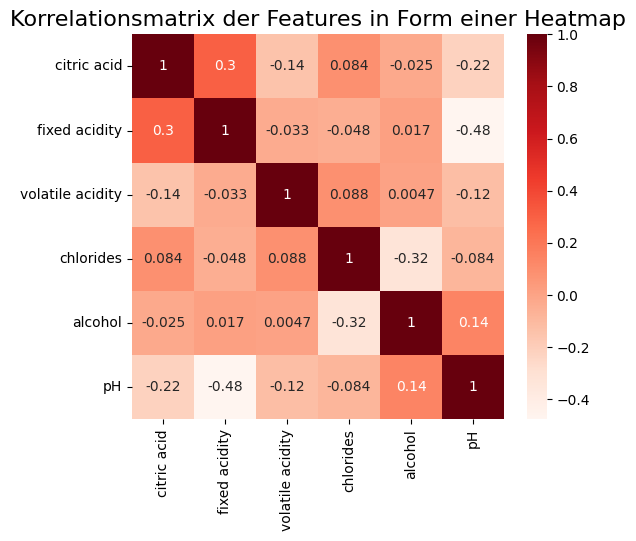

In [32]:
##### DO NOT CHANGE #####
cor = data.corr()
plt.figure(figsize=(6,5))
plt.title('Korrelationsmatrix der Features in Form einer Heatmap', fontsize=16)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

##### DO NOT CHANGE #####

Um einen besseren Überblick über den Datensatz sowie die Verteilung von Trainings- und Testdaten zu bekommen, sehen wir uns die Histogramme der Input- und des Target-Features an. Die obere Reihe zeigt die Trainingsmengen, die untere stellt die Testmengen dar, auf denen wir das Modell später testen/evaluieren.

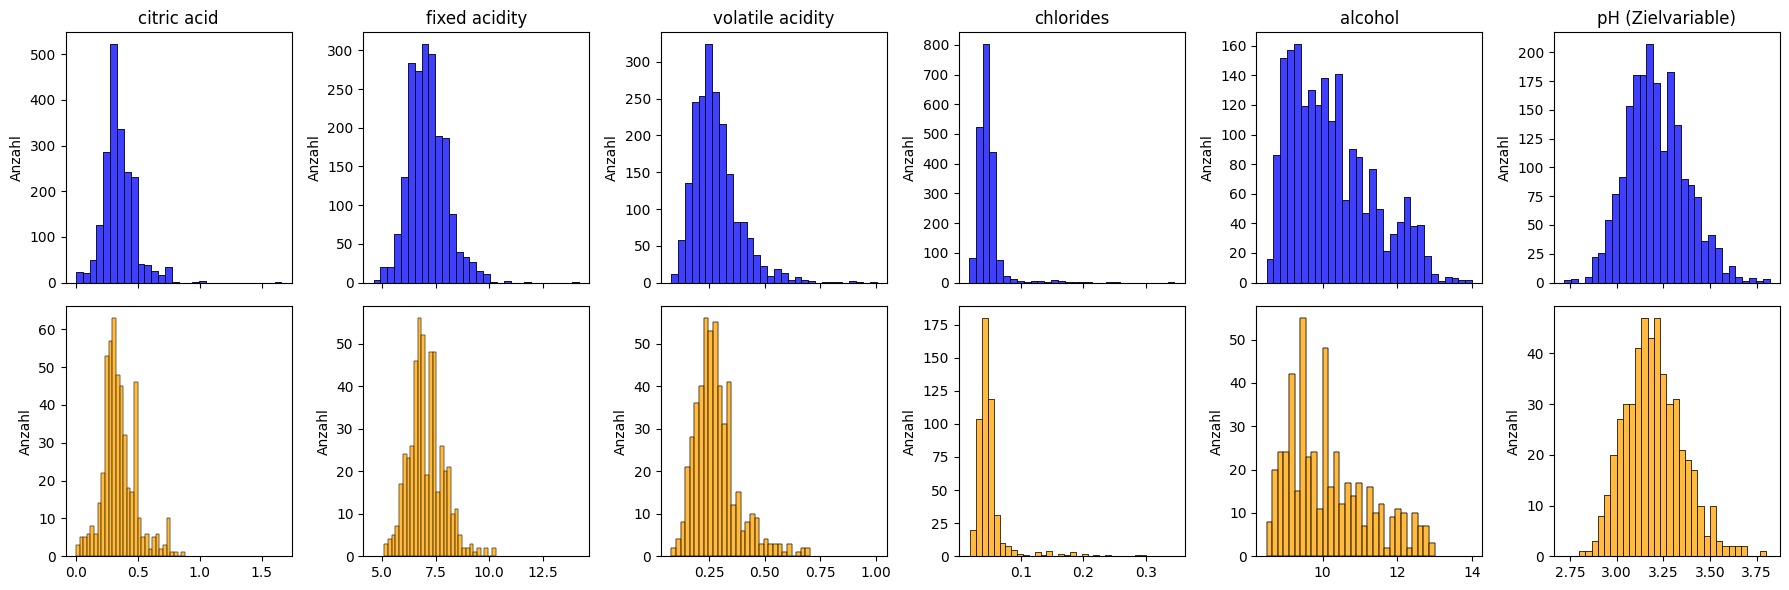

In [33]:
##### DO NOT CHANGE #####
fig,(ax0,ax1) = plt.subplots(2,6,figsize=(18,6), sharex='col')
for i,col in enumerate(data.columns):
    for set in ['train','test']:
        if i < 5:
            sns.histplot(X_train[:,i], kde=False, ax=ax0[i], bins=30, color='blue', alpha=0.5, label='Train')
            sns.histplot(X_test[:,i], kde=False, ax=ax1[i], bins=30, color='orange', alpha=0.5, label='Test')
        elif i == 5:
            sns.histplot(y_train[:,0], kde=False, ax=ax0[i], bins=30, color='blue', alpha=0.5, label='Train')
            sns.histplot(y_test[:,0], kde=False, ax=ax1[i], bins=30, color='orange', alpha=0.5, label='Test')
        if col =='pH':
            ax0[i].set_title(f'{col} (Zielvariable)')
        else:
            ax0[i].set_title(f'{col}')
        ax0[i].set_xlabel(col)
    ax0[i].set_ylabel('Anzahl')
    ax1[i].set_ylabel('Anzahl')
fig.tight_layout()

##### DO NOT CHANGE #####

Zunächst können wir beobachten, dass die Trainingsmengen ähnlich wie die Testmengen verteilt sind. Das ist eine wichtige Voraussetzung dafür, dass das Modell später gut generalisieren kann.

Wir sehen außerdem, dass sich die Wertebereiche der verschiedenen Features stark unterscheiden. Würden wir die Features in dieser Form für das neuronale Netz benutzen, könnte das zu Problemen beim Training führen, beispielsweise zu Ungleichgewicht in der Gewichtsanpassung, und zu instabiler oder langsamer Konvergenz.
Es ist daher üblich, die Input-daten von neuronalen Netzen zu skalieren. Dies sorgt dafür, dass die verschiedenen Features auf derselben Skala liegen, was die Konvergenz des Trainings verbessert (Stichwort: ill-conditioned Hessian).

Eine häufig genutzte Methode ist die Standardisierung, bei der für jedes Merkmal der Mittelwert subtrahiert und durch die Standardabweichung geteilt wird (“standard scaler”), die skalierten Merkmale haben daher annähernd Mittelwert 0 und Standardabweichung 1. Wir wenden diese Skalierung auf die Features als auch auf die Zielvariable an. Durch die Skalierung erhöhen wir die Vergleichbarkeit der Features untereinander, und erhöhen gleichzeitig die Stabilität des Netzes.

In [34]:
##### DO NOT CHANGE #####
# Standardization of input data (mean = 0, standard deviation = 1)
ss_input  = StandardScaler()
X_train= ss_input.fit_transform(X_train)
X_test= ss_input.transform(X_test)

# Standardization of target data (mean = 0, standard deviation = 1)
ss_target = StandardScaler()
y_train= ss_target.fit_transform(y_train)
y_test= ss_target.transform(y_test)

# We check if the standardization worked:
print("Mittelwerte der standardisierten Trainingsdaten (sollten nahe 0 sein):\n", 'Input: ', np.round(np.mean(X_train, axis=0), 3), 'Target: ', np.round(np.mean(y_train), 3),
      "\nStandardabweichungen der standardisierten Trainingsdaten (sollten nahe 1 sein):\n", 'Input: ', np.round(np.std(X_train, axis=0), 3), 'Target: ', np.round(np.std(y_train), 3), "\n")

print("Mittelwerte der standardisierten Testdaten (sollten nahe 0 sein):\n", 'Input: ', np.round(np.mean(X_test, axis=0), 3), 'Target: ', np.round(np.mean(y_test), 3),
        "\nStandardabweichungen der standardisierten Testdaten (sollten nahe 1 sein):\n", 'Input: ', np.round(np.std(X_test, axis=0), 3), 'Target: ', np.round(np.std(y_test), 3),)

##### DO NOT CHANGE #####

Mittelwerte der standardisierten Trainingsdaten (sollten nahe 0 sein):
 Input:  [ 0.  0. -0. -0.  0.] Target:  -0.0 
Standardabweichungen der standardisierten Trainingsdaten (sollten nahe 1 sein):
 Input:  [1. 1. 1. 1. 1.] Target:  1.0 

Mittelwerte der standardisierten Testdaten (sollten nahe 0 sein):
 Input:  [ 0.006 -0.031  0.029  0.183 -0.082] Target:  -0.069 
Standardabweichungen der standardisierten Testdaten (sollten nahe 1 sein):
 Input:  [1.068 0.93  0.972 1.436 0.991] Target:  0.982


**Tipp:** Im unteren Teil des Netzes könnt ihr euch, nachdem ihr das neuronale Netz gebaut habt, selbst "austoben", und verschiedene Variationen von Anzahl an Trainingsdaten, Wahl der Skalierung, Wahl der Hyperparameter etc., und deren Auswirkung auf die Modell-Performance ausprobieren. Wie verhält sich das Modell beispielsweise, wenn man die Feaures nicht skaliert?

# Aufgabe 3.1 - Implementierung des DataLoaders (1 Punkt)

Nun implementieren wir einen sogenannten `DataLoader`. Dieser hat die Aufgabe, unsere NumPy-Arrays in Batches für das Training aufzuteilen.
Später werden wir sehen, dass wir über unseren `DataLoader` einfach iterieren können, um in jeder Iteration eine neue Batch von Daten und den zugehörigen Labels zu erhalten.

Vervollständigt den folgenden DataLoader an der markierten Stelle.

In [35]:
class DataLoader:
    """
    A DataLoader-like object for iterating over arrays and returning batches of data.
    """

    def __init__(
            self,
            *arrays,
            batch_size=32,
            shuffle=False,
            drop_last=True
        ):
        """
        Initialize a DataLoader.

        *arrays (np.ndarrays): Arrays to store. Must have the same length @ dim 0.
        batch_size (int): Batch size to use when iterating
        shuffle (bool): If True, shuffle the data *in-place* whenever an
            iterator is created out of this object.
        drop_last (bool): If True, drop the last incomplete batch if the dataset size is not
            divisible by the batch size. If False, the last batch will include remaining samples.
        """

        # Ensure all arrays have the same number of samples
        if not all(array.shape[0] == arrays[0].shape[0] for array in arrays):
            raise ValueError("All input arrays must have the same number of samples (size along dimension 0).")

        self.arrays = arrays
        self.dataset_len = self.arrays[0].shape[0]
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.drop_last = drop_last

        # Calculate the number of batches
        self.n_batches, remainder = divmod(self.dataset_len, self.batch_size)
        if not self.drop_last and remainder > 0:
            self.n_batches += 1

    def __iter__(self):
        """
        Create an iterator for the DataLoader.
        If shuffle is True, shuffles the data before returning the iterator.
        """
        if self.shuffle:
            indices = np.random.permutation(self.dataset_len)
            self.arrays = tuple(array[indices] for array in self.arrays)
        self.i = 0
        return self

    def __next__(self):
        """
        Return the next batch of data.
        """
        if self.i >= self.dataset_len or (
            self.drop_last and (self.dataset_len - self.i) < self.batch_size
        ):
            raise StopIteration

        # Hinweis:
        # Hier wollen wir ein Tupel zurückgeben, wobei jeder Eintrag eine Batch des entsprechenden Arrays in self.arrays ist.
        # Wenn wir beispielsweise "x" und "y" als Arrays an unseren DataLoader im Konstruktor übergeben haben,
        # soll das Tupel am Ende eine Batch (basierend auf der aktuellen Position self.i) von x und eine Batch von y enthalten.
        # Vergiss am Ende nicht, self.i zu updaten.

        # YOUR CODE HERE
        start = self.i
        end = self.i + self.batch_size

        batch = tuple(array[start:end] for array in self.arrays)

        self.i = end

        return batch

    def __len__(self):
        """
        Return the number of batches.
        """
        return self.n_batches

In [36]:
##### DO NOT CHANGE #####
# ID: task-3-1-dataloader - possible points: 1

# Self-check
train_dataloader = DataLoader(
    np.array([5.0, 3.0, 2.0, 1.0, 5.0]),
    np.array([4.0, 5.0, 2.0, 3.0, 4.0]),
    batch_size=1,
    shuffle=False,
    drop_last=False
)

# Check number of batches
assert len(train_dataloader) == 5, "Number of batches should be 5"
# Check the first batch
assert np.all(np.isclose(
    next(iter(train_dataloader)),
    (np.array([5.0]), np.array([4.0]))
)), "First batch does not match expected output"

# hidden tests

##### DO NOT CHANGE #####

# Aufgabe 3.2 - ReLU-Aktivierungsfunktion und Ableitungen für die Gradientenberechnung (1+1+1 Punkt)

Als nächstes müssen wir die Backpropagation (und den Forward Pass) implementieren.
Dazu benötigen wir zunächst etwas Vorarbeit:

Vervollständige in der folgenden Zelle die Aktivierungsfunktion ReLU, deren Ableitungsfunktion, sowie die Ableitung des Loss nach dem Output. Nutze dafür die Ergebnisse von Aufgabe 1 dieser Übung.

In [37]:
def relu(a: np.ndarray) -> np.ndarray:
    """
    Computes the ReLU activation function.
    Args:
        a: Input array with arbitrary dimensions.
    Returns:
        The ReLU function applied to each entry in the input array.
        Returns an array with the same dimensions as the input.
    """

    # Hinweis:
    # Die ReLU-Funktion gibt für jedes Element den Maximalwert zwischen 0 und dem Element selbst zurück.
    # Ist der Input-Array in diesem Fall z.B in der Form (Anzahl der Neuronen, Anzahl der Samples im Batch),
    # so wird die ReLU-Funktion auf jedes Element dieses Arrays angewendet und es wird ein Array der gleichen Form zurückgegeben.

    # YOUR CODE HERE
    return np.maximum(0, a)

def relu_derivative(a: np.ndarray) -> np.ndarray:
    """
    Computes the derivative of the ReLU activation function.
    Args:
        a: Input array with arbitrary dimensions.
    Returns:
        The derivative of the ReLU function for each entry in the input array.
        Returns an array with the same dimensions as the input.
    """
    # YOUR CODE HERE
    return (a > 0).astype(a.dtype)

def dL_da(z: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
    Computes the derivative of the MSE loss with respect to a for a sample y.
    Args:
        z (np.ndarray): Predicted output (activation of the last layer) usually of shape ( Size of target (in Eq.6, this is given by C), Number of samples in batch).
        y (np.ndarray): True label for the sample usually of shape ( Size of target , Number of samples in batch).
    Returns:
        Derivative of the loss with respect to a of same shape as z and y.
    """

    # Hinweis:
    # Diese Funktion stellt das "Delta" der letzten Schicht im Backpropagation-Prozess dar (siehe Gleichung 6 im Übungsblatt).
    # Beachte, dass Gleichung 6 die Ableitung für ein Sample zeigt, hier wollen wir sie für ein Batch von Samples berechnen.
    # YOUR CODE HERE
    batch_size = z.shape[0]
    return 2 / batch_size * (z - y)


In [38]:
##### DO NOT CHANGE #####
# ID: task-3-2-part1-relu - possible points: 1

# Self-check
assert np.all(np.isclose(relu(np.array([-2])), np.array([0]), atol=0.1)), "ReLU of negative value is not zero"
assert np.all(np.isclose(relu(np.array([0])), np.array([0]), atol=0.1)), "ReLU of zero is not zero"
assert np.all(np.isclose(relu(np.array([2])), np.array([2]), atol=0.1)), "ReLU of positive value is not correct"
assert np.all(np.isclose(np.sum(relu(np.array([[6, 5, -2], [3, 2, 1]])), axis=0), np.array([9,7,1]), atol=0.1)), "ReLU does not yield the correct result"

# hidden tests

##### DO NOT CHANGE #####

In [39]:
##### DO NOT CHANGE #####
# ID: task-3-2-part2-relu_derivate - possible points: 1

# Self-check
assert np.all(np.isclose(relu_derivative(np.array([-1, 1])), np.array([0, 1]), atol=0.1)), "ReLU derivative is not correct"
assert np.all(np.isclose(relu_derivative(np.array([[-2, 2], [3,-4]])), np.array([[0, 1], [1, 0]]), atol=0.1)), "ReLU derivative is not correct"

# hidden tests

##### DO NOT CHANGE #####

In [40]:
##### DO NOT CHANGE #####
# ID: task-3-2-part3-dl_da - possible points: 1

# Self-check
assert np.all(np.isclose(dL_da(np.array([[0.5, 0.5], [1, 2]]), np.array([[1, 0], [3, 4]])), 0.5*np.array([[-1, 1], [-4, -4]]), atol=0.1)), "dL_da is not correct"
assert np.all(np.isclose(dL_da(np.array([[0.5, 0.5, 1.0]]), np.array([[1, 0, 4]])), np.array([[-1, 1, -6]]))), "dL_da is not correct"
assert np.all(np.isclose(dL_da(np.array([[ 1.0], [2.0], [5]]), np.array([[1], [0], [4]])), np.array([[0], [1.33], [0.67]]), atol = 0.1)), "dL_da is not correct"

# hidden tests

##### DO NOT CHANGE #####

# Aufgabe 3.3 - Mean Squared Error Loss, (1 Punkt); sowie Implementierung von Forward und Backward Pass (2+3 Punkte), und Gradient Descent Algorithmus (1 Punkt)

Neben den in 3.2 definierten Functionen benötigen wir eine Funktion, um den Loss zu berechnen. Implementiert dafür die Funktion `loss` in der folgenden `Network` Klasse. Die Funktion sollen den Mean Squared Error Loss, gemittelt über alle Samples in der Batch zurückgeben.<br>
Außerdem implementieren wir nun den Forward Pass und die Backpropagation. Hierbei helfen wieder die Formeln, welche wir im schriftlichen Teil der Übung, in Aufgabe 1, hergeleitet haben.
Implementiert den Code für den Forward Pass und den Backward Pass in der folgenden Klasse (siehe die markierten Stellen).

Bei der Implementierung ist es sehr wichtig, die Dimensionen der Arrays in den verschidenen Schritten zu berücksichtigen. Um den Überblick zu behalten und Fehler zu vermeiden, haben wir die Dimensionen der Arrays in den Kommentaren notiert. Hierbei wurden die folgenden Variablennamen verwendet:

- `N` - Anzahl der Samples in einer Batch
- `C` - Dimension der Target-Vektoren; in Beispiel unseres Wein-Datensatzes ist die Dimension 1 (die Zielvariable, also der pH-Wert, ist eine eindimensionale Variable); wir implementieren hier allerdings den allgemeinen Fall
- `D` - Anzahl der Input-Features (Im Fall des Wein-Datensatzes, den wir später verwenden: 5)

_Tipp: Für den Anfang ist es sinnvoll, als Batch-Size N=1 anzunehmen, auf diese Weise gibt man also nur ein Input Sample (also einen Vektor der Dimension D) in das neuronale Netz, und kann Forward und Backward Pass anhand der Berechnungen aus Aufgabe 1 leichter nachvollziehen._

In [41]:
class Network:
    """
    A simple feedforward neural network implementation in NumPy.
    """
    def __init__(self, structure: List[int], batch_size: int, learning_rate: float, seed: int = None):
        """
        Initialize the network.

        Args:
            structure (List[int]): List of layer sizes.
            batch_size (int): Batch size for training.
            learning_rate (float): Learning rate for gradient descent.
            seed (int): Random seed for weight initialization.
        """
        self.structure = structure
        self.num_layers = len(structure)
        self.batch_size = batch_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        np.random.seed(seed)

        self.Ws = [np.random.randn(l, prev_l) for prev_l, l in zip(structure[:-1], structure[1:])] # shape: (Neurons in current layer, Neurons in previous layer)
        self.Bs = [np.random.randn(l, 1) for l in structure[1:]] # shape: (Neurons in current layer, 1)

        # Initialize gradients
        self.dL_dWs = [np.zeros_like(W) for W in self.Ws] # Gradient of loss with respect to weights (same shape as weights)
        self.dL_dBs = [np.zeros_like(B) for B in self.Bs] # Gradient of loss with respect to biases (same shape as biases)

        # Initialize intermediate values for forward/backward passes
        self.Zs = [np.zeros((layer_size, batch_size)) for layer_size in structure]  # Include input layer to include input data as activation (Zs[0])
        self.As = [np.zeros((layer_size, batch_size)) for layer_size in structure[1:]]  # Exclude input layer

    def loss(self, y: np.ndarray, y_predicted: np.ndarray) -> float:

        """
        Computes the Mean Squared Error for a batch of samples.

        Args:
            y (np.ndarray): Array of labels of shape (N,C).
            y_predicted (np.ndarray): Predicted probabilities of shape (N,C).

        Returns:
            float: Loss value. We use mean squared error here.
        """

        # Hinweis
        # Man kann entweder zuerst den MSE pro Sample berechnen und dann den Mittelwert über alle Samples in der Batch nehmen,
        # oder direkt den Mittelwert über alle Samples und Output-Dimensionen (C) berechnen. Das Ergebnis ist dasselbe.

        # YOUR CODE HERE
        return np.mean((y_predicted - y) ** 2)


    def forward(self, x: np.ndarray) -> np.ndarray:
        """
        Performs a forward pass through the network.

        Args:
            x (np.ndarray): Input data of shape (N, D).

        Returns:
            np.ndarray: Output predictions of shape (N, C).
        """
        x = x.T  # Transpose for matrix multiplication (N,D) -> (D,N)

        self.Zs[0] = x  # The first "activation" is just the input

        for i, (W, B) in enumerate(zip(self.Ws, self.Bs)):

            current_input = self.Zs[i]  # Use stored activations for input to the next layer

            # Hinweis:
            # Berechne hier die Werte für z und a des aktuellen Layers:
            # 1. Berechne a, den gewichteten Summenvektor für das aktuelle Layer, basierend auf den Gewichten W,
            #    den Biases B und den Eingaben (current_input).
            # 2. Bestimme die Aktivierung z des aktuellen Layers:
            #    - Verwende die ReLU-Aktivierungsfunktion für alle Hidden Layer.
            #    - Verwende die Identitätsfunktion als Aktivierungsfunktion für das letzte Layer.
            # Stelle sicher, dass die Shapes der Variablen z und a korrekt sind:
            #    - a sollte die Shape (Neuronen im aktuellen Layer, N) haben
            #    - z sollte dieselbe Shape wie a haben


            # YOUR CODE HERE
            a = W @ current_input + B

            z = relu(a) if (i < len(self.Ws) - 1) else a

            self.As[i] = a
            self.Zs[i + 1] = z # Store activations for the next layer

        return z.T # Transpose back to (N,C)

    def forward_backward(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Perform a forward and backward pass for a batch of samples.
        After calling this function, self.dL_dWs will contain the gradient of the loss function with respect
        to the weights of each layer, averaged over the batch

        Args:
            x (np.ndarray): Input data of shape (N, D).
            y (np.ndarray): Labels of shape (N, C).
            (Remember: In the case of the wine-dataset, it is C = 1, since we have a regression task, and want to predict the pH value.)

        Returns:
            np.ndarray: Output predictions of shape (N, C).
        """

        #####  Forward pass #####

        # Im Forward Pass müssen wir die Zwischenwerte für alle Schichten und alle Stichproben speichern,
        # um sie im Backward Pass wiederverwenden zu können.

        y_predicted = self.forward(x)

        #####  Backward pass #####
        x = x.T # (N, D) -> (D, N) for easier matrix multiplication
        y = y.T # (N, C) -> (C, N) for easier matrix multiplication

        H = self.num_layers - 1

        for L in range(H, 0, -1): # Iterate over all layers, starting from the last layer (H) down to the first layer (1)

            # Hinweis:
            # Da die Indizes in Python bei 0 beginnen, müssen wir darauf achten, dass wir die Indizes für die Layer richtig verwenden.
            # Für self.Zs stimmt der Index mit dem Layer überein, d.h. self.Zs[0] enthält die Eingabe, self.Zs[1] die Aktivierung von Layer 1, etc.
            # Für self.Ws, self.Bs und self.As haben wir jedoch den Index um 1 verschoben, d.h. self.As enthält den Pre-Aktivierungswert von Layer L in self.As[L - 1].
            # Das gleiche gilt für self.dL_dWs und self.dL_dBs, die den Gradienten bezüglich der Gewichte und Biases enthalten und in dieser Funktion berechnet werden.
            #
            # 1. Berechne delta für das aktuelle Layer (siehe Übungsblatt Aufgabe 1):
            #    - Im letzten Layer (L == H) berechnest du delta mithilfe von dL_da().
            #    - Für alle anderen Layer berechnest du delta mithilfe von relu_derivative(self.As[L - 1])
            #      und der Matrixmultiplikation mit den Gewichten des nächsten Layers (self.Ws[L]); achte dabei auf die entsprechenden Dimensionen der Matrizen, und die dadurch
            #      entstehende Art der Multiplikation.
            #
            # 2. Aktualisiere die Gradienten:
            #    - self.dL_dWs[L - 1]: Der Gradient bezüglich der Gewichte im aktuellen Layer.
            #      - Berechne den Gradient, indem du die letzten Aktivierungen (self.Zs[L - 1]) mit delta multiplizierst (siehe Übungsblatt Gleichung 4)
            #      - Mittel die Ergebnisse über die Batch-Dimension
            #    - self.dL_dBs[L - 1]: Der Gradient bezüglich der Biases im aktuellen Layer (siehe Übungsblatt Gleichung 5)
            #      - Berechne den Gradient als Mittelwert von delta über die Batch-Dimension
            #
            # Hinweise:
            # - Verwende für die Berechnungen die gespeicherten Werte in self.Zs und self.As für die Aktivierungen und Pre-Aktivierungen.
            # - delta kann jeweils überschrieben werden
            # - Achte darauf, dass delta, self.dL_dWs[L - 1] und self.dL_dBs[L - 1] die korrekten Shapes haben:
            #   - delta hat die Shape (Neuronen im aktuellen Layer, N)
            #   - self.dL_dWs[L - 1] hat die Shape (Neuronen im aktuellen Layer, Neuronen im vorherigen Layer)
            #   - self.dL_dBs[L - 1] hat die Shape (Neuronen im aktuellen Layer, 1)

            # YOUR CODE HERE
            if L == H:
              delta = dL_da(self.Zs[L], y)
            else:
              delta = (self.Ws[L].T @ delta) * relu_derivative(self.As[L-1])

            self.dL_dWs[L-1] = delta @ self.Zs[L-1].T / x.shape[1]
            self.dL_dBs[L-1] = np.mean(delta, axis=1, keepdims=True)

        return y_predicted


    def gradient_descent(self, x: np.ndarray, y: np.ndarray) -> Tuple[float]:
        """
        Perform a gradient descent step.

        Args:
            x (np.ndarray): Input data of shape (N, D).
            y (np.ndarray): One-hot encoded labels of shape (N, C).

        Returns:
            float: Loss for the batch.
        """

        y_predicted = self.forward_backward(x, y) # Process batch
        loss = self.loss(y, y_predicted)


        # Führe nun für alle Gewichte und Biases ein (Minibatch) Gradient Descent Update durch.
        # Aktualisiere dafür die Gewichte und Biases basierend auf den zuvor berechneten Gradienten in self.dL_dWs und self.dL_dBs.
        # Verwende die Lernrate self.learning_rate für das Update, und denke daran, dass du die Gradienten vom aktuellen Wert der Gewichte und Biases subtrahieren musst;
        # siehe (Minibatch) Gradient Descent Algorithmus aus der VL.

        # YOUR CODE HERE
        for i in range(self.num_layers-1):
          self.Ws[i] -= self.learning_rate * self.dL_dWs[i]
          self.Bs[i] -= self.learning_rate * self.dL_dBs[i]

        return loss

    def test(self, test_dataloader) -> Tuple[float, float]:
        """
        Evaluate the network on a test dataset.

        Args:
            test_dataloader: DataLoader object for the test dataset.

        Returns:
            float: Average loss on the test dataset.
        """

        total_loss = 0.0

        for x, y in test_dataloader:
            y_predicted = self.forward(x)
            total_loss += self.loss(y, y_predicted)

        avg_loss = total_loss / len(test_dataloader)
        return avg_loss

    def fit(self, train_dataloader, test_dataloader, epochs: int, test_loss_frequency: int = 1) -> Tuple[List[float], List[float]]:
        """
        Train the network.

        Args:
            train_dataloader: DataLoader object for the training dataset.
            test_dataloader: DataLoader object for the test dataset.
            epochs (int): Number of epochs.
            test_loss_frequency (int): Frequency for testing the network.

        Returns:
            Tuple[List[float], List[float]]: Training and test losses over epochs.
        """
        losses = []
        test_losses = []

        last_test_loss = None

        # Train the network
        for epoch in (pbar := tqdm(range(epochs))): # Did you know about the walrus operator := ?
            total_loss = 0.0

            # Iterate over all batches
            for x, y in train_dataloader:
                loss = self.gradient_descent(x, y) # Performs a forward and backward pass and updates weights

                total_loss += loss

            # Calculate average loss for the epoch
            avg_loss = total_loss / len(train_dataloader)

            if (epoch + 1) % test_loss_frequency == 0:
                last_test_loss = self.test(test_dataloader)

            pbar.set_description(f"Epoch {epoch + 1}, Loss: {avg_loss:.3f}; Test Loss: {last_test_loss:.3f}")

            # Append losses for plotting later
            losses.append(avg_loss)
            test_losses.append(last_test_loss)

        return losses, test_losses

In [42]:
##### DO NOT CHANGE #####
# self-check
network = Network([5, 8, 8, 2], batch_size=32, learning_rate=0.01)
# check loss funkction
y = np.array([[0, 1], [1, 0], [1, 0], [0, 1]]) # here we have 4 samples and 2 dimensions of the target value instead of 1
y_predicted = np.array([[0.1, 0.9], [0.8, 0.2], [0.7, 0.3], [0.2, 0.8]])

assert np.isclose(network.loss(y, y), 0.0, atol=0.01), "Loss calculation is incorrect"
assert np.isclose(network.loss(y, y_predicted), 0.045, atol=0.05), "Loss calculation is incorrect"

##### DO NOT CHANGE #####

In [43]:
##### DO NOT CHANGE #####
# self-check
network = Network([2, 1, 1], batch_size=10000, learning_rate=1, seed = 42)
# check forward function
x = np.array([[0.0, 2], [3, 4], [5, 6]])
y_predicted = network.forward(x)
assert np.isclose(y_predicted, np.array([[0.57], [1.35], [1.82]]), atol = 0.1).all(), "forward function is not correct"

# check forward_backward function
y = np.array([[0.0], [1.0], [1.0]])
network.forward_backward(x, y)
assert np.isclose(network.dL_dWs[0], np.array([[2.24, 3.25]]), atol = 0.1).all(), "forward_backward function is not correct"
assert np.isclose(network.dL_dWs[1], np.array([[2.80]]), atol = 0.1).all(), "forward_backward function is not correct"

##### DO NOT CHANGE #####

In [44]:
##### DO NOT CHANGE #####
# self-check
network = Network([2, 1, 1], batch_size=10000, learning_rate=1, seed = 42)
# check gradient descent function
x = np.array([[0.0, 1.0], [3, 4]])
y = np.array([[0.0], [1.0]])
def dummy_forward_backward(self, x, y):
    return 0
# Wir überschreiben hier die forward_backward Funktion des Netzwerks,
# damit wir die Gradienten manuell setzen können, um die gradient_descent Funktion zu testen:
network.forward_backward = dummy_forward_backward.__get__(network)
network.dL_dWs = [np.ones_like(W) for W in network.Ws]
network.dL_dBs = [np.ones_like(B) for B in network.Bs]

network.gradient_descent(x, y)
assert np.isclose(network.Ws[0], np.array([[-0.50, -1.14]]), atol = 0.1).all(), "gradient_descent function is not correct"
assert np.isclose(network.Ws[1], np.array([[-0.35]]), atol = 0.1).all(), "gradient_descent function is not correct"

##### DO NOT CHANGE #####

In [45]:
##### DO NOT CHANGE #####
# ID: task-3-3-loss-function - possible points: 1

# hidden tests


##### DO NOT CHANGE #####

In [46]:
##### DO NOT CHANGE #####
# ID: task-3-3-forward-function - possible points: 2

# hidden tests


##### DO NOT CHANGE #####

In [47]:
##### DO NOT CHANGE #####
# ID: task-3-3-forward_backward-function-function - possible points: 3

# hidden tests


##### DO NOT CHANGE #####

In [48]:
##### DO NOT CHANGE #####
# ID: ask-3-3-gradient_descent-function - possible points: 1

# hidden tests


##### DO NOT CHANGE #####

# 3.4 Training des neuronalen Netzes und Suche nach optimalen Hyperparametern (nicht bewertet)

Wie ihr sehen könnt, benötigt es tatsächlich nicht viele Zeilen Code, um ein neuronales Netz und insbesondere Backpropagation selbst zu implementieren!

Da das Training mit NumPy je nach Wahl der Hyperparameter recht zeitintensiv ist (insbesondere, für 300+ Studierenden) und das unser Auto-Grading erschweren würde, endet der bewertete Teil des Notebooks an dieser Stelle.

Im folgenden Abschnitt könnt ihr versuchen das Netzwerk selbst auf die Wein-Daten fitten und so überprüfen ob eure Implementierung funktioniert. Eure Aufgabe ist es, geeignete Hyperparameter wie `epochs`, `learning_rate` und `batch_size` zu finden, um die Performance des Modells zu maximieren.
Schafft ihr es, einen Test-Loss kleiner als 0.6 zu erzielen?

Zusätzlich könnt ihr hier die Auswirkungen von Overfitting auszuprobieren:
- Verwende dazu einen DataLoader mit deutlich weniger Trainingsdaten.
- Fitte ein vergleichsweise großes Modell auf diesen reduzierten Datensatz.

Wie verhalten sich der Trainings- und Testfehler?

In [ ]:
# First, let's define some training hyperparameters:

epochs: int = None
learning_rate: float = None
batch_size: int = None
network_structure = [] # [train_images.shape[1], ..., 1] # Hier kannst du auch mit verschiedenen hidden layer sizes experimentieren

# Wird nicht bewertet!

# YOUR CODE HERE
raise NotImplementedError()

# Hinweis:
# Im nächsten Schritt definieren wir die DataLoader für Trainings- und Testdatensätze.
# Du kannst hierbei auch mal testen, wie sich ein kleinerer Trainingsdatensatz auf die Performance
# des Netzwerks auswirkt, indem du z.B. nur die ersten 500 Trainingsproben verwendest

# Create DataLoader for training and test datasets
# These dataloaders allow easy iteration over data batches during training and evaluation/testing.
train_dataloader = DataLoader(
    X_train,
    y_train,
    batch_size=batch_size,
    shuffle=True, # Shuffle training data
    drop_last=True  # Drop incomplete batches
)

test_dataloader = DataLoader(
    X_test,
    y_test,
    batch_size=batch_size,
    shuffle=False,  # Do not shuffle test data
    drop_last=True  # Drop incomplete batches
)

In [ ]:
##### DO NOT CHANGE #####
# Berechne die Gesamtanzahl der Parameter im Netzwerk
n_params = 0  # Initialize the parameter counter

# Iterate through each pair of consecutive layers to compute parameters
for input_size, output_size in zip(network_structure[:-1], network_structure[1:]):
    n_params += (input_size + 1) * output_size  # Add weights and biases for each layer

print(f"Total number of parameters in the network: {n_params}")

# # Diese If-Abfrage darf nicht entfernt werden;
# # ansonsten wird das auto-grading zu lange dauern und abbrechen.
grading_env_var = os.getenv('NBGRADER_EXECUTION', None)
is_grading = (grading_env_var == "autograde" or grading_env_var == "validate")

##### DO NOT CHANGE #####

Nun trainieren wir das Netz:

In [ ]:
##### DO NOT CHANGE #####
if not is_grading:
    network = Network(network_structure, batch_size, learning_rate)
    losses, test_losses = network.fit(train_dataloader, test_dataloader, epochs)

##### DO NOT CHANGE #####

Nachdem wir während des Trainings den Trainings-Loss berechneten, und nach jeder Epoche auch den Test-Loss - also den Wert der Loss-Funktion auf den Testdaten - berechnet haben, können wir die beiden Loss-Kurven über die Zahl der Epochen darstellen:

In [ ]:
##### DO NOT CHANGE #####
if not is_grading:
    # Plot the loss curve:
    plt.figure(figsize=(7, 3))
    plt.plot(losses, label="Training Loss - Fehler auf den Trainingsdaten")
    plt.plot(test_losses, label="Test Loss - Fehler auf den Testdaten")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.ylim(0,1.5)
    plt.xlim(0, epochs)
    plt.show()

##### DO NOT CHANGE #####

Im Folgenen skalieren wir die Zieldaten sowie die Modell-Outputs zurück in die ursprüngliche Größenordnung. Wir können jetzt sowohl für die Training- als auch für die Testdaten die Vorhersagen des Modells (Predicted targets) sowie tatsächlichen Zielwerte (True targets) gegenüberstellen. Die schwarze Diagonale in den Abbildungen stellt die Gerade dar, auf denen Modell-Output und Target-Wert genau übereinstimmen.

Wie nah liegen die Outputs deines Modells an der Diagonalen? Unterscheiden sich die Ergebnisse des Trainings- und des Testdatensatzes? Wie gut passen die Verteilungen von Predictions und den echten Targets zusammen?

In [ ]:
##### DO NOT CHANGE #####
if not is_grading:
    y_predicted = network.forward(X_test[:])
    y_predicted_train = network.forward(X_train)
    x_line = np.arange(2.75,3.85,0.1)

    y_train_rescaled = ss_target.inverse_transform(y_train)
    y_test_rescaled = ss_target.inverse_transform(y_test)
    y_predicted_train_rescaled = ss_target.inverse_transform(y_predicted_train)
    y_predicted_rescaled = ss_target.inverse_transform(y_predicted)


    fig = plt.figure(figsize=(10,4))
    gs = gridspec.GridSpec(3, 7)
    ax_train = plt.subplot(gs[1:3, :2])
    ax_train_xDist = plt.subplot(gs[0, :2],sharex=ax_train)
    ax_train_yDist = plt.subplot(gs[1:3, 2],sharey=ax_train)
    ax_test = plt.subplot(gs[1:3, 4:6])
    ax_test_xDist = plt.subplot(gs[0, 4:6],sharex=ax_test)
    ax_test_yDist = plt.subplot(gs[1:3, 6],sharey=ax_test)

    ax_train.set(xlabel='True training targets', ylabel='Predicted training targets')
    ax_train.text(0.7,0.95, 'Black line: \nPredictions fit \nperfectly', horizontalalignment='right', verticalalignment='top', transform=ax_train.transAxes)
    ax_train.scatter(y_train_rescaled, y_predicted_train_rescaled, s = 3)
    ax_train.plot(x_line, x_line, color='black')
    ax_train.set_xlim(2.5,3.85)
    ax_train.set_ylim(2.5,3.85)

    ax_train_xDist.hist(y_train_rescaled, bins=30, label='True values', density=True, color='blue')
    ax_train_xDist.set(ylabel='Distr. true \ntrain. targets')
    ax_train_yDist.hist(y_predicted_train_rescaled, bins=30,  label='True values', density=True, orientation='horizontal', align='mid', color='blue')
    ax_train_yDist.set(xlabel='Distr. pred. \ntraining targets')

    ax_test.scatter(y_test_rescaled, y_predicted_rescaled, s = 3, color = 'orange')
    ax_test.plot(x_line, x_line, color='black')
    ax_test.set(xlabel='True test targets', ylabel='Pred. test targets')
    ax_test.text(0.7,0.95, 'Black line: \nPredictions fit \nperfectly', horizontalalignment='right', verticalalignment='top', transform=ax_test.transAxes)
    ax_test.set_xlim(2.5,3.85)
    ax_test.set_ylim(2.5,3.85)

    ax_test_xDist.hist(y_test_rescaled, bins=30, label='True values', density=True, color = 'orange')
    ax_test_xDist.set(ylabel='Distr. true \ntest targets')

    ax_test_yDist.hist(y_predicted_rescaled, bins=30, label='True values', density=True, orientation='horizontal', align='mid', color = 'orange')
    ax_test_yDist.set(xlabel='Distr. pred. \ntest targets')
    fig.tight_layout()

##### DO NOT CHANGE #####

### Einfluss von Hyperparametern

Im Folgenden betrachten wir noch konkret, wie sich die Wahl verschiedener Hyperparameter auf die Qualität des Modells auswirkt. Im Konkreten sehen wir uns die Hyperparameter Lernrate, Epochenanzahl und Batch-Größe an.
Wähle dafür eine Liste an Werten für die 3 Hyperparameter, um im nächsten Schritt das neuronale Netz mit den entsprechenden Hyperparametern zu trainieren. Schlussendlich könnt ihr euch ansehen, wie sich verschiedene Kombinationen auf die Modellperformance, hier konkret auf den Test-Loss, auswirken.

In [ ]:
set_of_learning_rates: List[float] = [None]
set_of_epochs: List[int] = [None]
set_of_batch_sizes: List[int] = [None]

# choose some hyperparameter combinations to try out (not graded/wird nicht bewertet)
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
##### DO NOT CHANGE #####
if not is_grading: # Diese If-Abfrage darf nicht entfernt werden;
    # ansonsten wird das auto-grading zu lange dauern und abbrechen.
    lr_list = []
    ep_list = []
    batch_list = []
    mse_test_list = []
    for learning_rate in  set_of_learning_rates:
        for epochs in set_of_epochs:
            for batch_size in set_of_batch_sizes:
                lr_list.append(learning_rate)
                ep_list.append(epochs)
                batch_list.append(batch_size)
                mse_test = None
                if not learning_rate is None:
                    network = Network(network_structure, batch_size, learning_rate)
                    losses, test_losses = network.fit(train_dataloader, test_dataloader, epochs)
                    mse_test = losses[-1]
                mse_test_list.append(mse_test)
    df_hp = pd.DataFrame(data={"lr": lr_list, "ep": ep_list, "batch": batch_list, "mse_test": mse_test_list})

##### DO NOT CHANGE #####

In [ ]:
##### DO NOT CHANGE #####
if not is_grading:
    if not len(df_hp) ==1 and not df_hp.isna().all().all():
        x = np.array([1,2,3,4])
        df_hp.loc[df_hp['mse_test'].isna(),'mse_test'] = 1
        df_hp.loc[df_hp['mse_test'] > 1,'mse_test'] = 1
        max_mse = df_hp.loc[:, "mse_test"].max()
        min_mse = df_hp.loc[:, "mse_test"].min()
        cmap = cm.get_cmap('plasma')
        norm = colors.Normalize(vmin=min_mse, vmax=max_mse)

        for i in range(len(df_hp)):
            y_lr = df_hp.loc[i, "lr"]/df_hp.loc[:, "lr"].max()
            y_ep = df_hp.loc[i, "ep"]/df_hp.loc[:, "ep"].max()
            y_batch = df_hp.loc[i, "batch"]/df_hp.loc[:, "batch"].max()
            y_mse = df_hp.loc[i, "mse_test"]/max_mse
            x_new = np.linspace(x.min(), x.max(), 300)
            y = np.array([y_lr, y_ep, y_batch, y_mse])
            spl = make_interp_spline(x, y, k=3)
            y_smooth = spl(x_new)
            norm = colors.Normalize(vmin=min_mse, vmax=max_mse)
            plt.plot(x_new, y_smooth, color = cmap(norm(df_hp.loc[i, "mse_test"])))
        plt.vlines(1,0,1.1, linestyles='--', colors='k')
        plt.vlines(2,0,1.1, linestyles='--', colors='k')
        plt.vlines(3,0,1.1, linestyles='--', colors='k')
        plt.vlines(4,0,1.1, linestyles='--', colors='k')
        plt.text(1.1, 1., df_hp.loc[:, "lr"].max())
        plt.text(1.1, df_hp.loc[:, "lr"].min()/df_hp.loc[:, "lr"].max(), df_hp.loc[:, "lr"].min())
        plt.text(2.1, 1.0, df_hp.loc[:, "ep"].max())
        plt.text(2.1, df_hp.loc[:, "ep"].min()/df_hp.loc[:, "ep"].max(), df_hp.loc[:, "ep"].min())
        plt.text(3.1, 1.0, df_hp.loc[:, "batch"].max())
        plt.text(3.1, df_hp.loc[:, "batch"].min()/df_hp.loc[:, "batch"].max(), df_hp.loc[:, "batch"].min())
        plt.text(4.1, 1, round(max_mse,3))
        plt.text(4.1, df_hp.loc[:, "mse_test"].min()/max_mse, round(df_hp.loc[:, "mse_test"].min(),3))

        plt.xlim(0.5,4.5)
        plt.yticks([])
        plt.xticks([1,2,3,4], labels=['learning rate', 'epochs', 'batch size', 'MSE on test set'])
        plt.show()

##### DO NOT CHANGE #####

### Abschließende Bemerkungen
Wir hoffen, dass dir diese Übung einen guten Einblick geben konnte, wie neuronale Netze tatsächlich funktionieren. Der Workflow, den wir hier gezeigt haben, ähnelt stark dem, den du bei realen Machine-Learning-Problemen verwenden würdest – mit dem Unterschied, dass du in der Praxis auf leistungsfähige Libraries wie PyTorch oder TensorFlow zurückgreifen würdest, anstatt alles selbst zu implementieren.

Hier sind einige weitere Ideen, was du mit diesem Code machen kannst, wenn du mehr lernen und tiefer eintauchen möchtest:

- Was ist der niedrigste Test-Loss, die du mit unserer Implementierung erreichen kannst?
    - Um schneller zu besseren Ergebnissen zu kommen, könntest du Optimierungsverfahren wie den Adam-Optimizer oder SGD mit Momentum implementieren. Diese Methoden beschleunigen die Konvergenz und können dir helfen, noch bessere Resultate zu erzielen.
- Ersetze NumPy durch PyTorch-Tensoren, behalte aber unseren Backpropagation-Code bei (verwende nicht PyTorchs Auto-Differenzierung).
    - Meistens reicht es, `np` durch `torch` zu ersetzen.
    - Verarbeite eine Batch auf der GPU, indem du den PyTorch Tensor und die Gewichte auf die GPU verschiebst. Führe den Forward- und Backward-Pass sowie den Gradient-Descent-Schritt auf der GPU durch.  Auch die weights und deren Ableitungen und auch den gradient descent step solltest du mit Tensoren auf der GPU ausführen. Ist das schneller als vorher?
- Vergleiche mit einem äquivalenten Code, in dem du unser Modell mit typischen PyTorch-Layern implementierst und nun auch PyTorchs Autodifferenzierung für das Training verwendest. Welcher Code ist schneller? Pytorch oder unserer?
- Wie kannst du das neuronale Netz umbauen, sodass es für ein Klassifizierungs-Problem, also z.B. für die Erkennung von Bildern geeignet ist?
    - Fully-connected neural networks sind nicht ideal für die Verarbeitung von Bildern, wie wir in der Vorlesung sehen (werden).
    - Kannst du den Code so erweitern, dass er auch Convolutional Layer unterstützt? Wie sehen hier die Ableitungen aus?

Viel Spaß beim Experimentieren!

In der Saalübung werden wir uns außerdem noch ansehen, wie man ein neuronales Netz in Libraries wie PyTorch oder TensorFlow implementiert.